# Assignment 3: Building Neural Networks and CNN

START OF ACADEMIC INTERGITY STATEMENT <br><br>
I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work.<br><br>
END OF ACADEMIC INTERGITY STATEMENT

## Part 1: Building a Basic NN [20 points]

In [1]:
# importing pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read csv file into data frame
df = pd.read_csv('income_dataset.csv') 

In [3]:
# describe function on dataset
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256000e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897801e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055511e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178242e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
# head function on dataset
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K


In [5]:
# head function on dataset
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K


In [6]:
# mean function on dataset
df.mean()

/var/folders/f6/_vngcq595z16gs5ggwbgv0rh0000gn/T/ipykernel_29447/3488411937.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


age                   38.581647
fnlwgt            189780.114312
education.num         10.080679
capital.gain        1077.648844
capital.loss          87.303830
hours.per.week        40.437456
dtype: float64

In [7]:
# columns function on dataset
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [8]:
# info function on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32560 non-null  float64
 3   education       32561 non-null  object 
 4   education.num   32561 non-null  int64  
 5   marital.status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   capital.gain    32561 non-null  int64  
 9   capital.loss    32561 non-null  int64  
 10  hours.per.week  32561 non-null  int64  
 11  native.country  32561 non-null  object 
 12  income          32561 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 3.2+ MB


In [9]:
df[df=='?'].count()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [10]:
for i in df.columns:
    df = df[~df[i].isin(['?'])]
df.dropna(inplace=True)

In [11]:
df.shape

(30162, 13)

In [12]:
# calculate the sum of missing entries in the dataset
df.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [13]:
# convert columns with datatype object to data type categorical
df['workclass'] = df.workclass.astype('category')
df['education'] = df.education.astype('category')
df['marital.status'] = df['marital.status'].astype('category')
df['occupation'] = df.occupation.astype('category')
df['relationship'] = df.relationship.astype('category')
df['native.country'] = df['native.country'].astype('category')
df['income'] = df.income.astype('category')
print(df.dtypes)



age                  int64
workclass         category
fnlwgt             float64
education         category
education.num        int64
marital.status    category
occupation        category
relationship      category
capital.gain         int64
capital.loss         int64
hours.per.week       int64
native.country    category
income            category
dtype: object


<AxesSubplot:>

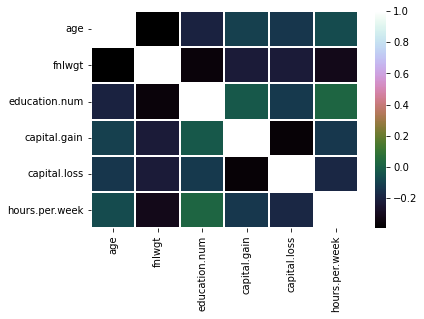

In [14]:
import seaborn as sns
income = df.corr()

sns.heatmap(income.corr(), linewidths=2, cmap='cubehelix')

In [15]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076456,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076456,1.000000,-0.044999,0.000419,-0.009573,-0.022918
education.num,0.043526,-0.044999,1.000000,0.124416,0.079646,0.152522
capital.gain,0.080154,0.000419,0.124416,1.000000,-0.032229,0.080432
capital.loss,0.060165,-0.009573,0.079646,-0.032229,1.000000,0.052417
hours.per.week,0.101599,-0.022918,0.152522,0.080432,0.052417,1.000000


<AxesSubplot:xlabel='marital.status', ylabel='age'>

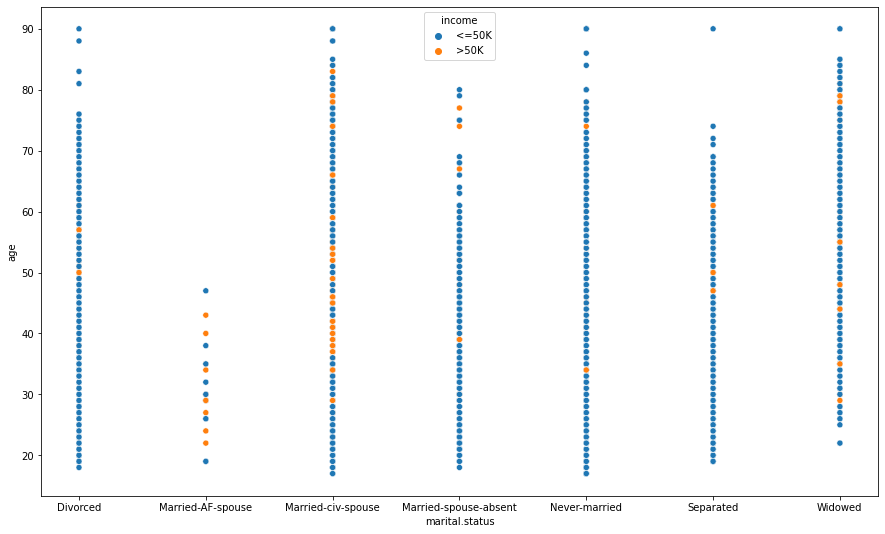

In [16]:
plt.figure(figsize=(15,9))
sns.scatterplot(data =df, x='marital.status', y='age', hue='income')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education.num'}>,
        <AxesSubplot:title={'center':'capital.gain'}>],
       [<AxesSubplot:title={'center':'capital.loss'}>,
        <AxesSubplot:title={'center':'hours.per.week'}>]], dtype=object)

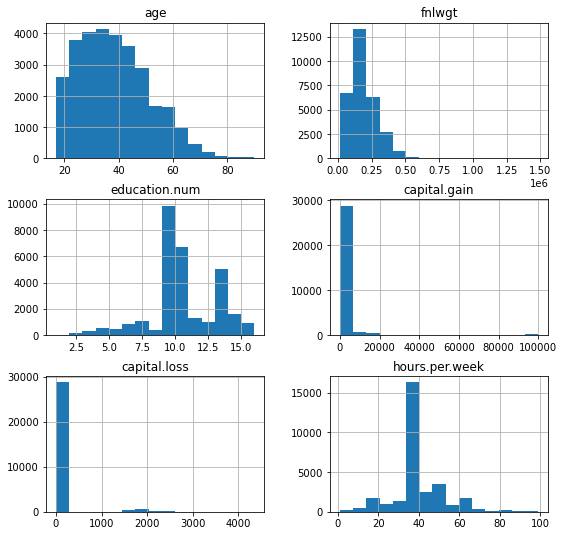

In [17]:
numerical = ['age', 'fnlwgt','education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
df[numerical].hist(bins=15, figsize=(9, 9), layout=(3,2))

In [18]:
df = pd.get_dummies(df, columns=['workclass','education','marital.status', 'occupation', 'relationship', 'native.country', 'income'], drop_first=True)

df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_>50K
1,82,186061.0,9,0,4356,18,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359.0,4,0,3900,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663.0,10,0,3900,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,34,216864.0,9,0,3770,45,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,38,150601.0,6,0,3770,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
y = df['income_>50K']
X = df.drop(columns=['income_>50K'])

print('The shape of y is:', y.shape)
print('The shape of X is:', X.shape)

The shape of y is: (30162,)
The shape of X is: (30162, 91)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import  MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)


In [22]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [23]:
import keras
from keras import layers, initializers



model = keras.Sequential()
model.add(keras.Input(shape=(91,)))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2944      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


2022-04-12 17:41:50.342303: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


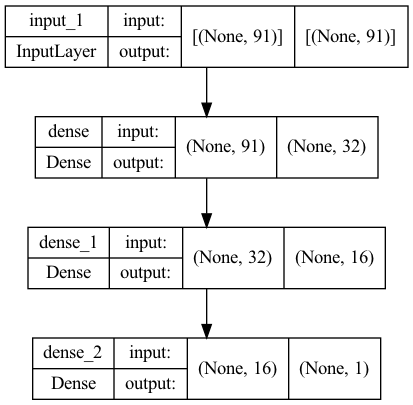

In [24]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [25]:

history = model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=2, validation_data=(X_test,y_test))

Epoch 1/20
2413/2413 - 5s - loss: 0.3739 - accuracy: 0.8244 - val_loss: 0.3591 - val_accuracy: 0.8296 - 5s/epoch - 2ms/step
Epoch 2/20
2413/2413 - 4s - loss: 0.3381 - accuracy: 0.8432 - val_loss: 0.3490 - val_accuracy: 0.8359 - 4s/epoch - 1ms/step
Epoch 3/20
2413/2413 - 3s - loss: 0.3274 - accuracy: 0.8489 - val_loss: 0.3409 - val_accuracy: 0.8419 - 3s/epoch - 1ms/step
Epoch 4/20
2413/2413 - 3s - loss: 0.3224 - accuracy: 0.8508 - val_loss: 0.3375 - val_accuracy: 0.8420 - 3s/epoch - 1ms/step
Epoch 5/20
2413/2413 - 3s - loss: 0.3188 - accuracy: 0.8545 - val_loss: 0.3505 - val_accuracy: 0.8319 - 3s/epoch - 1ms/step
Epoch 6/20
2413/2413 - 3s - loss: 0.3166 - accuracy: 0.8529 - val_loss: 0.3359 - val_accuracy: 0.8404 - 3s/epoch - 1ms/step
Epoch 7/20
2413/2413 - 3s - loss: 0.3143 - accuracy: 0.8550 - val_loss: 0.3333 - val_accuracy: 0.8457 - 3s/epoch - 1ms/step
Epoch 8/20
2413/2413 - 5s - loss: 0.3119 - accuracy: 0.8574 - val_loss: 0.3366 - val_accuracy: 0.8417 - 5s/epoch - 2ms/step
Epoch 9/

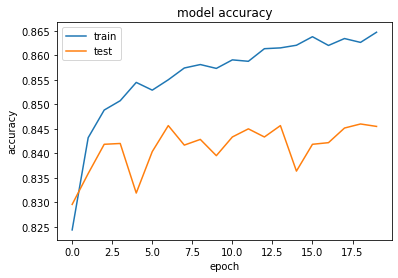

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')

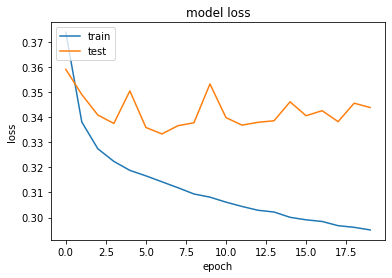

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')

In [28]:
model_tanh = keras.Sequential()
model_tanh.add(keras.Input(shape=(91,)))
model_tanh.add(layers.Dense(32, activation="relu"))
model_tanh.add(layers.Dense(16, activation="relu"))
model_tanh.add(layers.Dense(1, activation="tanh"))
model_tanh.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_tanh.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                2944      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [29]:
history_tanh = model_tanh.fit(X_train, y_train, batch_size=10, epochs=20, verbose=2, validation_data=(X_test,y_test))

Epoch 1/20
2413/2413 - 3s - loss: 0.4497 - accuracy: 0.8200 - val_loss: 0.3954 - val_accuracy: 0.8255 - 3s/epoch - 1ms/step
Epoch 2/20
2413/2413 - 3s - loss: 0.3979 - accuracy: 0.8321 - val_loss: 0.4521 - val_accuracy: 0.8289 - 3s/epoch - 1ms/step
Epoch 3/20
2413/2413 - 3s - loss: 0.3842 - accuracy: 0.8391 - val_loss: 0.3975 - val_accuracy: 0.8309 - 3s/epoch - 1ms/step
Epoch 4/20
2413/2413 - 4s - loss: 0.3643 - accuracy: 0.8454 - val_loss: 0.3776 - val_accuracy: 0.8394 - 4s/epoch - 2ms/step
Epoch 5/20
2413/2413 - 3s - loss: 0.3653 - accuracy: 0.8470 - val_loss: 0.3745 - val_accuracy: 0.8417 - 3s/epoch - 1ms/step
Epoch 6/20
2413/2413 - 3s - loss: 0.3549 - accuracy: 0.8496 - val_loss: 0.3743 - val_accuracy: 0.8391 - 3s/epoch - 1ms/step
Epoch 7/20
2413/2413 - 3s - loss: 0.3525 - accuracy: 0.8523 - val_loss: 0.3796 - val_accuracy: 0.8364 - 3s/epoch - 1ms/step
Epoch 8/20
2413/2413 - 3s - loss: 0.3689 - accuracy: 0.8492 - val_loss: 0.3873 - val_accuracy: 0.8407 - 3s/epoch - 1ms/step
Epoch 9/

In [30]:
model_elu = keras.Sequential()
model_elu.add(keras.Input(shape=(91,)))
model_elu.add(layers.Dense(32, activation="relu"))
model_elu.add(layers.Dense(16, activation="relu"))
model_elu.add(layers.Dense(1, activation="elu"))
model_elu.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_elu.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                2944      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [31]:
history_elu = model_elu.fit(X_train, y_train, batch_size=10, epochs=20, verbose=2, validation_data=(X_test,y_test))

Epoch 1/20
2413/2413 - 3s - loss: 0.4271 - accuracy: 0.8227 - val_loss: 0.4018 - val_accuracy: 0.8223 - 3s/epoch - 1ms/step
Epoch 2/20
2413/2413 - 3s - loss: 0.3912 - accuracy: 0.8390 - val_loss: 0.3921 - val_accuracy: 0.8178 - 3s/epoch - 1ms/step
Epoch 3/20
2413/2413 - 3s - loss: 0.3699 - accuracy: 0.8429 - val_loss: 0.3764 - val_accuracy: 0.8361 - 3s/epoch - 1ms/step
Epoch 4/20
2413/2413 - 3s - loss: 0.3533 - accuracy: 0.8465 - val_loss: 0.3693 - val_accuracy: 0.8266 - 3s/epoch - 1ms/step
Epoch 5/20
2413/2413 - 3s - loss: 0.3479 - accuracy: 0.8458 - val_loss: 0.3988 - val_accuracy: 0.8381 - 3s/epoch - 1ms/step
Epoch 6/20
2413/2413 - 3s - loss: 0.3525 - accuracy: 0.8450 - val_loss: 0.4158 - val_accuracy: 0.8364 - 3s/epoch - 1ms/step
Epoch 7/20
2413/2413 - 3s - loss: 0.3594 - accuracy: 0.8432 - val_loss: 0.3751 - val_accuracy: 0.8417 - 3s/epoch - 1ms/step
Epoch 8/20
2413/2413 - 3s - loss: 0.3427 - accuracy: 0.8486 - val_loss: 0.3756 - val_accuracy: 0.8372 - 3s/epoch - 1ms/step
Epoch 9/

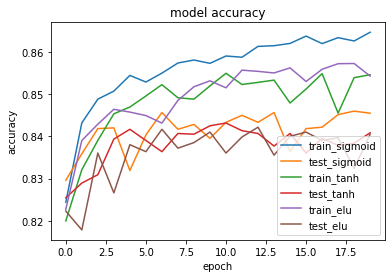

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_tanh.history['accuracy'])
plt.plot(history_tanh.history['val_accuracy'])
plt.plot(history_elu.history['accuracy'])
plt.plot(history_elu.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_sigmoid', 'test_sigmoid','train_tanh','test_tanh','train_elu','test_elu'], loc='lower right')

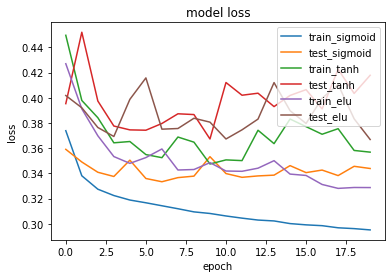

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_tanh.history['loss'])
plt.plot(history_tanh.history['val_loss'])
plt.plot(history_elu.history['loss'])
plt.plot(history_elu.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_sigmoid', 'test_sigmoid','train_tanh','test_tanh','train_elu','test_elu'], loc='upper right')

In [34]:
import keras
from keras import layers, initializers



model_sgd = keras.Sequential()
model_sgd.add(keras.Input(shape=(91,)))
model_sgd.add(layers.Dense(32, activation="relu"))
model_sgd.add(layers.Dense(16, activation="relu"))
model_sgd.add(layers.Dense(1, activation="sigmoid"))
model_sgd.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model_sgd.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                2944      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [35]:
history_sgd = model_sgd.fit(X_train, y_train, batch_size=10, epochs=20, verbose=2, validation_data=(X_test,y_test))

Epoch 1/20
2413/2413 - 3s - loss: 0.4283 - accuracy: 0.7982 - val_loss: 0.3838 - val_accuracy: 0.8203 - 3s/epoch - 1ms/step
Epoch 2/20
2413/2413 - 2s - loss: 0.3696 - accuracy: 0.8300 - val_loss: 0.3734 - val_accuracy: 0.8235 - 2s/epoch - 997us/step
Epoch 3/20
2413/2413 - 3s - loss: 0.3583 - accuracy: 0.8322 - val_loss: 0.3647 - val_accuracy: 0.8256 - 3s/epoch - 1ms/step
Epoch 4/20
2413/2413 - 2s - loss: 0.3516 - accuracy: 0.8368 - val_loss: 0.3633 - val_accuracy: 0.8263 - 2s/epoch - 993us/step
Epoch 5/20
2413/2413 - 2s - loss: 0.3474 - accuracy: 0.8386 - val_loss: 0.3582 - val_accuracy: 0.8289 - 2s/epoch - 1ms/step
Epoch 6/20
2413/2413 - 2s - loss: 0.3445 - accuracy: 0.8399 - val_loss: 0.3550 - val_accuracy: 0.8308 - 2s/epoch - 996us/step
Epoch 7/20
2413/2413 - 3s - loss: 0.3421 - accuracy: 0.8409 - val_loss: 0.3539 - val_accuracy: 0.8316 - 3s/epoch - 1ms/step
Epoch 8/20
2413/2413 - 2s - loss: 0.3402 - accuracy: 0.8424 - val_loss: 0.3555 - val_accuracy: 0.8331 - 2s/epoch - 1ms/step
Ep

In [36]:

model_am = keras.Sequential()
model_am.add(keras.Input(shape=(91,)))
model_am.add(layers.Dense(32, activation="relu"))
model_am.add(layers.Dense(16, activation="relu"))
model_am.add(layers.Dense(1, activation="sigmoid"))
model_am.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model_am.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                2944      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [37]:
history_am = model_am.fit(X_train, y_train, batch_size=10, epochs=20, verbose=2, validation_data=(X_test,y_test))

Epoch 1/20
2413/2413 - 3s - loss: 0.4453 - accuracy: 0.7851 - val_loss: 0.3927 - val_accuracy: 0.8155 - 3s/epoch - 1ms/step
Epoch 2/20
2413/2413 - 3s - loss: 0.3715 - accuracy: 0.8271 - val_loss: 0.3728 - val_accuracy: 0.8230 - 3s/epoch - 1ms/step
Epoch 3/20
2413/2413 - 3s - loss: 0.3577 - accuracy: 0.8329 - val_loss: 0.3655 - val_accuracy: 0.8250 - 3s/epoch - 1ms/step
Epoch 4/20
2413/2413 - 3s - loss: 0.3507 - accuracy: 0.8368 - val_loss: 0.3618 - val_accuracy: 0.8256 - 3s/epoch - 1ms/step
Epoch 5/20
2413/2413 - 2s - loss: 0.3471 - accuracy: 0.8387 - val_loss: 0.3677 - val_accuracy: 0.8248 - 2s/epoch - 992us/step
Epoch 6/20
2413/2413 - 3s - loss: 0.3438 - accuracy: 0.8399 - val_loss: 0.3580 - val_accuracy: 0.8303 - 3s/epoch - 1ms/step
Epoch 7/20
2413/2413 - 2s - loss: 0.3414 - accuracy: 0.8414 - val_loss: 0.3567 - val_accuracy: 0.8308 - 2s/epoch - 1ms/step
Epoch 8/20
2413/2413 - 3s - loss: 0.3398 - accuracy: 0.8406 - val_loss: 0.3569 - val_accuracy: 0.8328 - 3s/epoch - 1ms/step
Epoch 

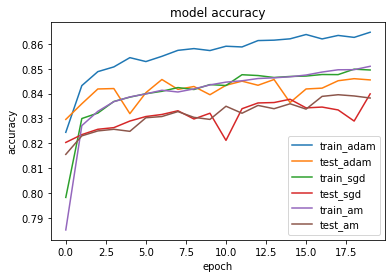

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_sgd.history['accuracy'])
plt.plot(history_sgd.history['val_accuracy'])
plt.plot(history_am.history['accuracy'])
plt.plot(history_am.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_adam', 'test_adam','train_sgd','test_sgd','train_am','test_am'], loc='lower right')

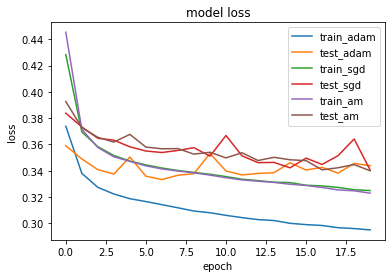

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])
plt.plot(history_am.history['loss'])
plt.plot(history_am.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_adam', 'test_adam','train_sgd','test_sgd','train_am','test_am'], loc='upper right')

In [40]:
model_do1 = keras.Sequential()
model_do1.add(keras.Input(shape=(91,)))
model_do1.add(layers.Dropout(0.50))
model_do1.add(layers.Dense(32, activation="relu"))
model_do1.add(layers.Dropout(0.50))
model_do1.add(layers.Dense(16, activation="relu"))
model_do1.add(layers.Dense(1, activation="sigmoid"))
model_do1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_do1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 91)                0         
                                                                 
 dense_15 (Dense)            (None, 32)                2944      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [41]:

history_do1 = model_do1.fit(X_train, y_train, batch_size=10, epochs=20, verbose=2, validation_data=(X_test,y_test))

Epoch 1/20
2413/2413 - 4s - loss: 0.4776 - accuracy: 0.7677 - val_loss: 0.3984 - val_accuracy: 0.8208 - 4s/epoch - 2ms/step
Epoch 2/20
2413/2413 - 3s - loss: 0.4447 - accuracy: 0.7846 - val_loss: 0.3881 - val_accuracy: 0.8215 - 3s/epoch - 1ms/step
Epoch 3/20
2413/2413 - 3s - loss: 0.4343 - accuracy: 0.7888 - val_loss: 0.3821 - val_accuracy: 0.8250 - 3s/epoch - 1ms/step
Epoch 4/20
2413/2413 - 3s - loss: 0.4335 - accuracy: 0.7946 - val_loss: 0.3869 - val_accuracy: 0.8228 - 3s/epoch - 1ms/step
Epoch 5/20
2413/2413 - 3s - loss: 0.4286 - accuracy: 0.7968 - val_loss: 0.3751 - val_accuracy: 0.8298 - 3s/epoch - 1ms/step
Epoch 6/20
2413/2413 - 3s - loss: 0.4318 - accuracy: 0.7954 - val_loss: 0.3871 - val_accuracy: 0.8231 - 3s/epoch - 1ms/step
Epoch 7/20
2413/2413 - 3s - loss: 0.4273 - accuracy: 0.7954 - val_loss: 0.3810 - val_accuracy: 0.8286 - 3s/epoch - 1ms/step
Epoch 8/20
2413/2413 - 3s - loss: 0.4272 - accuracy: 0.7973 - val_loss: 0.3829 - val_accuracy: 0.8314 - 3s/epoch - 1ms/step
Epoch 9/

In [42]:
model_do2 = keras.Sequential()
model_do2.add(keras.Input(shape=(91,)))
model_do2.add(layers.Dropout(0.25))
model_do2.add(layers.Dense(32, activation="relu"))
model_do2.add(layers.Dropout(0.25))
model_do2.add(layers.Dense(16, activation="relu"))
model_do2.add(layers.Dense(1, activation="sigmoid"))
model_do2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_do2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 91)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                2944      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [43]:
history_do2 = model_do1.fit(X_train, y_train, batch_size=10, epochs=20, verbose=2, validation_data=(X_test,y_test))

Epoch 1/20
2413/2413 - 3s - loss: 0.4164 - accuracy: 0.8024 - val_loss: 0.3835 - val_accuracy: 0.8334 - 3s/epoch - 1ms/step
Epoch 2/20
2413/2413 - 3s - loss: 0.4168 - accuracy: 0.8046 - val_loss: 0.3726 - val_accuracy: 0.8371 - 3s/epoch - 1ms/step
Epoch 3/20
2413/2413 - 3s - loss: 0.4187 - accuracy: 0.8055 - val_loss: 0.3776 - val_accuracy: 0.8336 - 3s/epoch - 1ms/step
Epoch 4/20
2413/2413 - 3s - loss: 0.4198 - accuracy: 0.8035 - val_loss: 0.3851 - val_accuracy: 0.8311 - 3s/epoch - 1ms/step
Epoch 5/20
2413/2413 - 3s - loss: 0.4223 - accuracy: 0.8018 - val_loss: 0.3833 - val_accuracy: 0.8324 - 3s/epoch - 1ms/step
Epoch 6/20
2413/2413 - 3s - loss: 0.4172 - accuracy: 0.8026 - val_loss: 0.3751 - val_accuracy: 0.8299 - 3s/epoch - 1ms/step
Epoch 7/20
2413/2413 - 3s - loss: 0.4211 - accuracy: 0.8007 - val_loss: 0.3888 - val_accuracy: 0.8318 - 3s/epoch - 1ms/step
Epoch 8/20
2413/2413 - 3s - loss: 0.4176 - accuracy: 0.8006 - val_loss: 0.3737 - val_accuracy: 0.8318 - 3s/epoch - 1ms/step
Epoch 9/

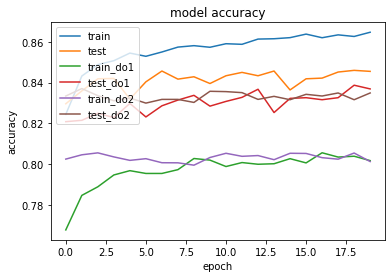

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_do1.history['accuracy'])
plt.plot(history_do1.history['val_accuracy'])
plt.plot(history_do2.history['accuracy'])
plt.plot(history_do2.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test','train_do1','test_do1','train_do2','test_do2'], loc='upper left')

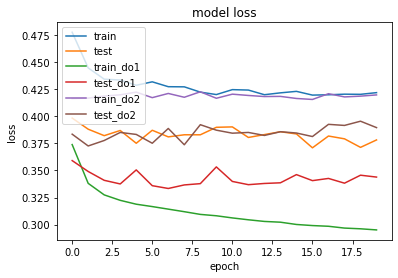

In [45]:
import matplotlib.pyplot as plt

plt.plot(history_do1.history['loss'])
plt.plot(history_do1.history['val_loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_do2.history['loss'])
plt.plot(history_do2.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test','train_do1','test_do1','train_do2','test_do2'], loc='upper left')

## Trying 4 different methods with base model

### Using Early Stopping

In [46]:
import keras
from keras import layers, initializers

callback = keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.001, patience=2, verbose=2)
model_es = keras.Sequential()
model_es.add(keras.Input(shape=(91,)))
model_es.add(layers.Dense(32, activation="relu"))
model_es.add(layers.Dense(16, activation="relu"))
model_es.add(layers.Dense(1, activation="sigmoid"))
model_es.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_es.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                2944      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [47]:

history_es = model_es.fit(X_train, y_train, batch_size=10, epochs=20, verbose=2, callbacks=[callback], validation_data=(X_test,y_test))

Epoch 1/20
2413/2413 - 3s - loss: 0.3710 - accuracy: 0.8293 - val_loss: 0.3594 - val_accuracy: 0.8314 - 3s/epoch - 1ms/step
Epoch 2/20
2413/2413 - 4s - loss: 0.3355 - accuracy: 0.8456 - val_loss: 0.3467 - val_accuracy: 0.8374 - 4s/epoch - 2ms/step
Epoch 3/20
2413/2413 - 3s - loss: 0.3269 - accuracy: 0.8482 - val_loss: 0.3393 - val_accuracy: 0.8392 - 3s/epoch - 1ms/step
Epoch 4/20
2413/2413 - 3s - loss: 0.3213 - accuracy: 0.8516 - val_loss: 0.3403 - val_accuracy: 0.8412 - 3s/epoch - 1ms/step
Epoch 5/20
2413/2413 - 3s - loss: 0.3186 - accuracy: 0.8535 - val_loss: 0.3352 - val_accuracy: 0.8419 - 3s/epoch - 1ms/step
Epoch 6/20
2413/2413 - 3s - loss: 0.3148 - accuracy: 0.8559 - val_loss: 0.3485 - val_accuracy: 0.8430 - 3s/epoch - 1ms/step
Epoch 7/20
2413/2413 - 3s - loss: 0.3135 - accuracy: 0.8551 - val_loss: 0.3439 - val_accuracy: 0.8450 - 3s/epoch - 1ms/step
Epoch 8/20
2413/2413 - 3s - loss: 0.3115 - accuracy: 0.8551 - val_loss: 0.3384 - val_accuracy: 0.8405 - 3s/epoch - 1ms/step
Epoch 8:

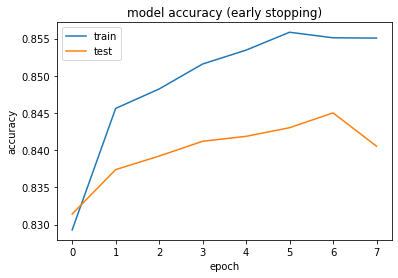

In [48]:
import matplotlib.pyplot as plt

plt.plot(history_es.history['accuracy'])
plt.plot(history_es.history['val_accuracy'])
plt.title('model accuracy (early stopping)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')

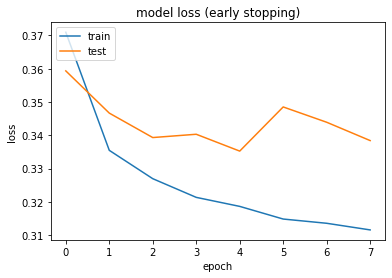

In [49]:
plt.plot(history_es.history['loss'])
plt.plot(history_es.history['val_loss'])
plt.title('model loss (early stopping)')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')

In [50]:
import keras
from keras import layers, initializers
from sklearn.model_selection import KFold
import numpy as np

acc_per_fold = []
loss_per_fold = []
num_folds = 10

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)


fold_no = 1
for train, test in kfold.split(inputs, targets):

    callback = keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.001, patience=2, verbose=2)
    model_es2 = keras.Sequential()
    model_es2.add(keras.Input(shape=(91,)))
    model_es2.add(layers.Dense(32, activation="relu"))
    model_es2.add(layers.Dense(16, activation="relu"))
    model_es2.add(layers.Dense(1, activation="sigmoid"))
    model_es2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    history_es2 = model_es2.fit(inputs[train], targets[train], batch_size=10, epochs=20, verbose=2, callbacks=[callback])
    # Generate generalization metrics
    scores = model_es2.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model_es2.metrics_names[0]} of {scores[0]}; {model_es2.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
2715/2715 - 3s - loss: 0.3724 - accuracy: 0.8230 - 3s/epoch - 1ms/step
Epoch 2/20
2715/2715 - 3s - loss: 0.3372 - accuracy: 0.8428 - 3s/epoch - 1ms/step
Epoch 3/20
2715/2715 - 3s - loss: 0.3284 - accuracy: 0.8474 - 3s/epoch - 1ms/step
Epoch 4/20
2715/2715 - 3s - loss: 0.3240 - accuracy: 0.8492 - 3s/epoch - 1ms/step
Epoch 5/20
2715/2715 - 3s - loss: 0.3211 - accuracy: 0.8517 - 3s/epoch - 937us/step
Epoch 6/20
2715/2715 - 3s - loss: 0.3173 - accuracy: 0.8517 - 3s/epoch - 932us/step
Epoch 7/20
2715/2715 - 3s - loss: 0.3147 - accuracy: 0.8527 - 3s/epoch - 931us/step
Epoch 8/20
2715/2715 - 3s - loss: 0.3123 - accuracy: 0.8539 - 3s/epoch - 985us/step
Epoch 9/20
2715/2715 - 3s - loss: 0.3101 - accuracy: 0.8546 - 3s/epoch - 1ms/step
Epoch 10/20
2715/2715 - 3s - loss: 0.3075 - accuracy: 0.8577 - 3s/epoch - 976us/step
Epoch 11/20
2715/2715 - 3s - loss: 0.3058 - accuracy: 0.8586 - 3s/epoch 